In [52]:
%matplotlib inline

In [53]:
import numpy as np
from sklearn.externals import joblib
import pickle

In [54]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.patches import Rectangle
mpl.style.use('default')
mpl.rcParams["figure.dpi"] = 600
mpl.rcParams["font.size"] = 7
mpl.rcParams["font.family"] = 'sans-serif'
mpl.rcParams["font.sans-serif"] = 'Arial'
mpl.rcParams["mathtext.fontset"] = 'cm'
mpl.rcParams['text.usetex'] = False
mpl.rcParams["figure.figsize"] = [3.5, 3.5]

In [55]:
gsearch1 = joblib.load('./result/classifier/GridSearchCV_SVC_without_intensity.joblib')
gsearch2 = joblib.load('./result/classifier/GridSearchCV2_SVC_without_intensity.joblib')
with open("./result/classifier/GridSearchCV3_SVC_without_intensity.pkl","rb") as file:
    gsearch3_cv_results_ = pickle.load(file)

In [56]:
test_score = list(gsearch1.cv_results_['mean_test_score'][5:-1]) + list(gsearch2.cv_results_['mean_test_score']) + list(gsearch3_cv_results_['mean_test_score'][:-1])
train_score = list(gsearch1.cv_results_['mean_train_score'][5:-1]) + list(gsearch2.cv_results_['mean_train_score']) + list(gsearch3_cv_results_['mean_train_score'][:-1])

D:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


In [57]:
axis_x = [1, 2, 4, 6, 8, 10, 15, 20, 25, 30, 40, 50, 60, 70, 80, 90 ,100]

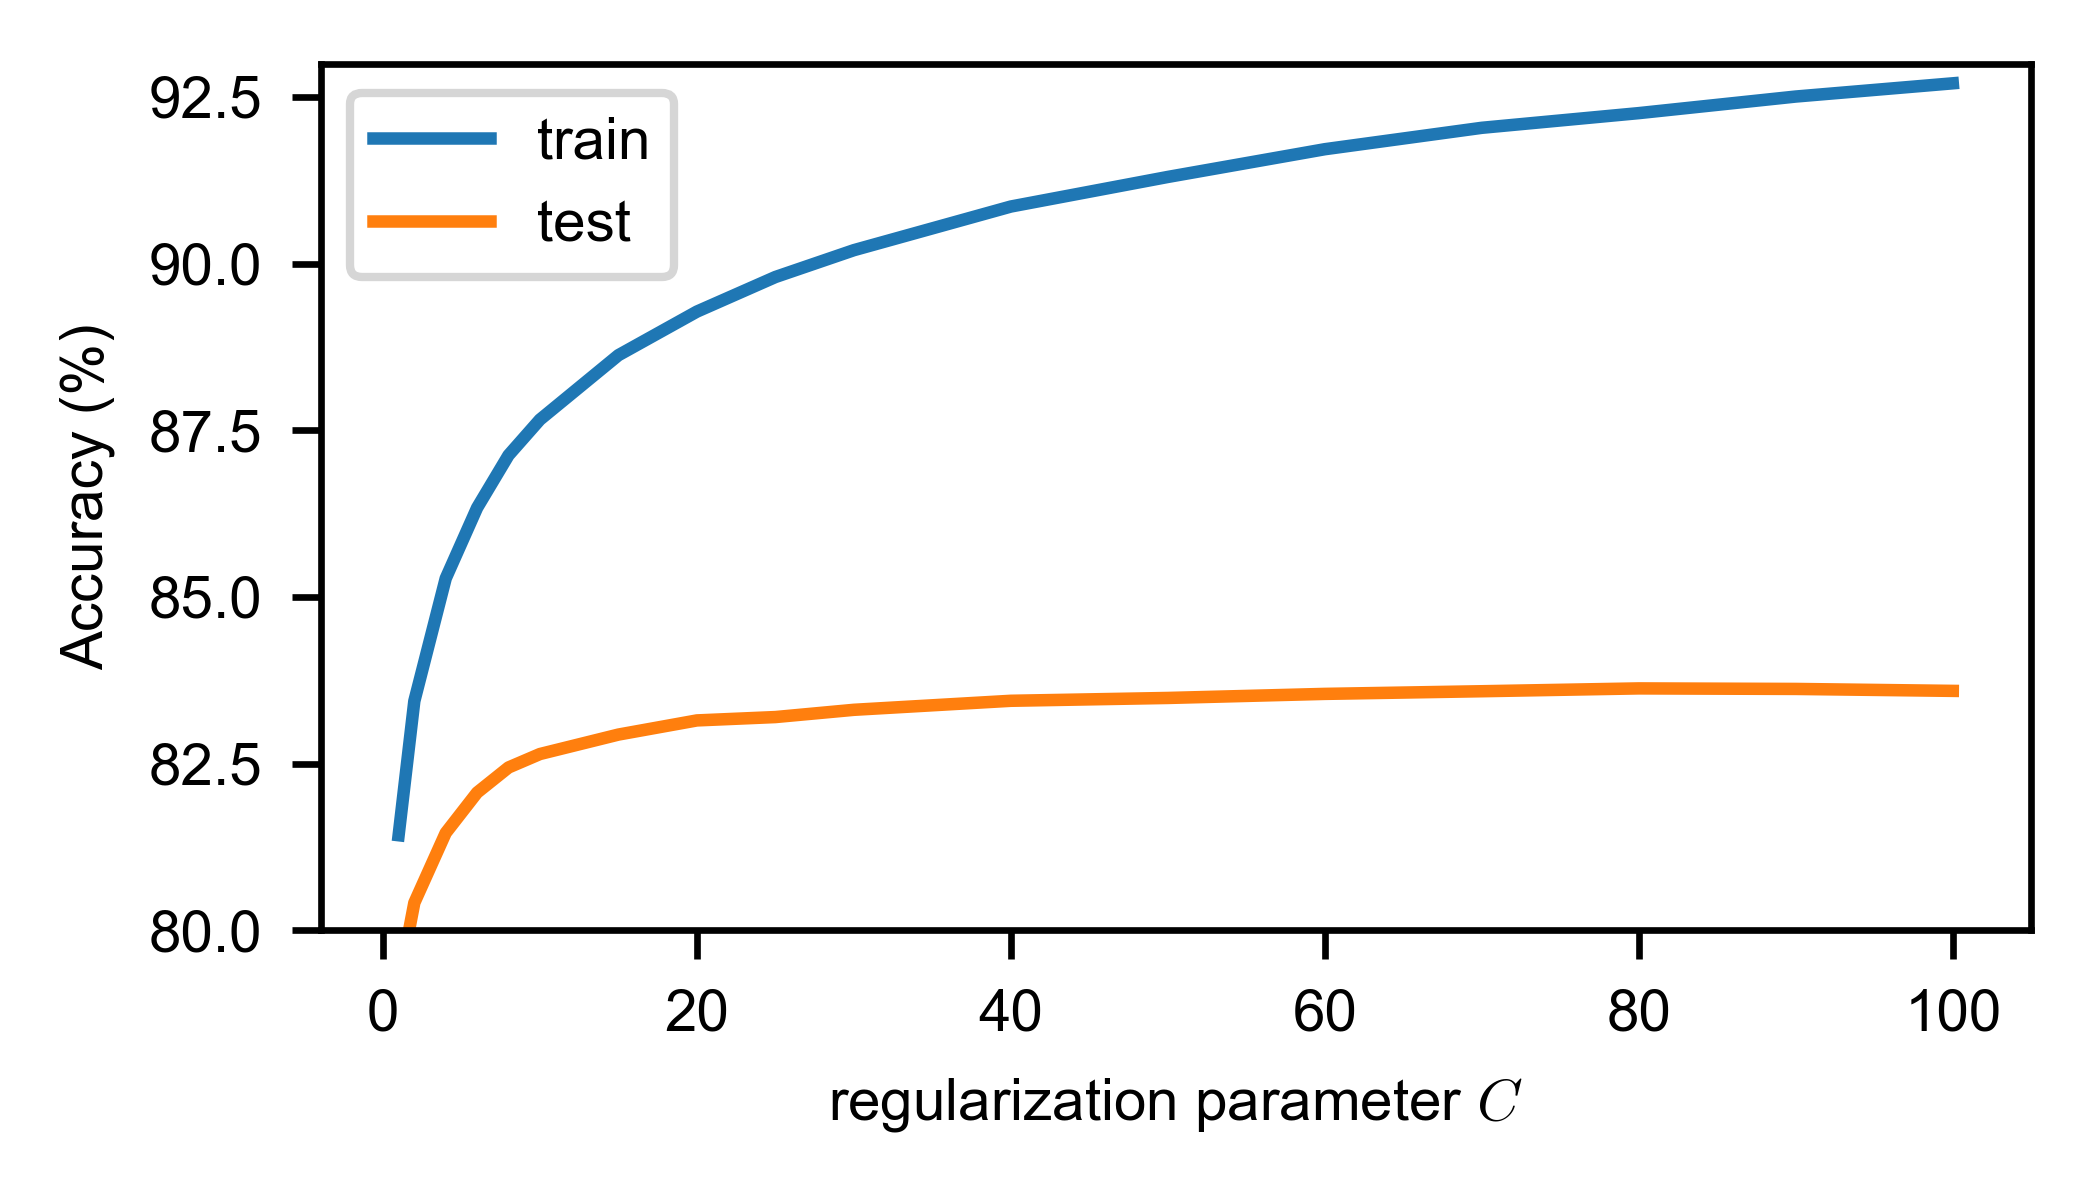

In [58]:
plt.figure(figsize=[3.5,2])
plt.plot(axis_x, train_score, label='train')
plt.plot(axis_x, test_score, label='test')
plt.legend()
ax = plt.gca()

ax.set_xlabel('regularization parameter $C$')

ax.set_ylim([0.8, 0.93])
ax.set_yticks(np.arange(0.8, 0.93, 0.025))
ax.set_yticklabels([80.0, 82.5, 85.0,87.5,90.0,92.5])
ax.set_ylabel('Accuracy (%)')

plt.tight_layout()
plt.savefig("./result/figure/SVC_parameter.png")

In [59]:
cvresult_values = np.load('./result/classification_result/xgb_cvresult_mlogloss.npy')

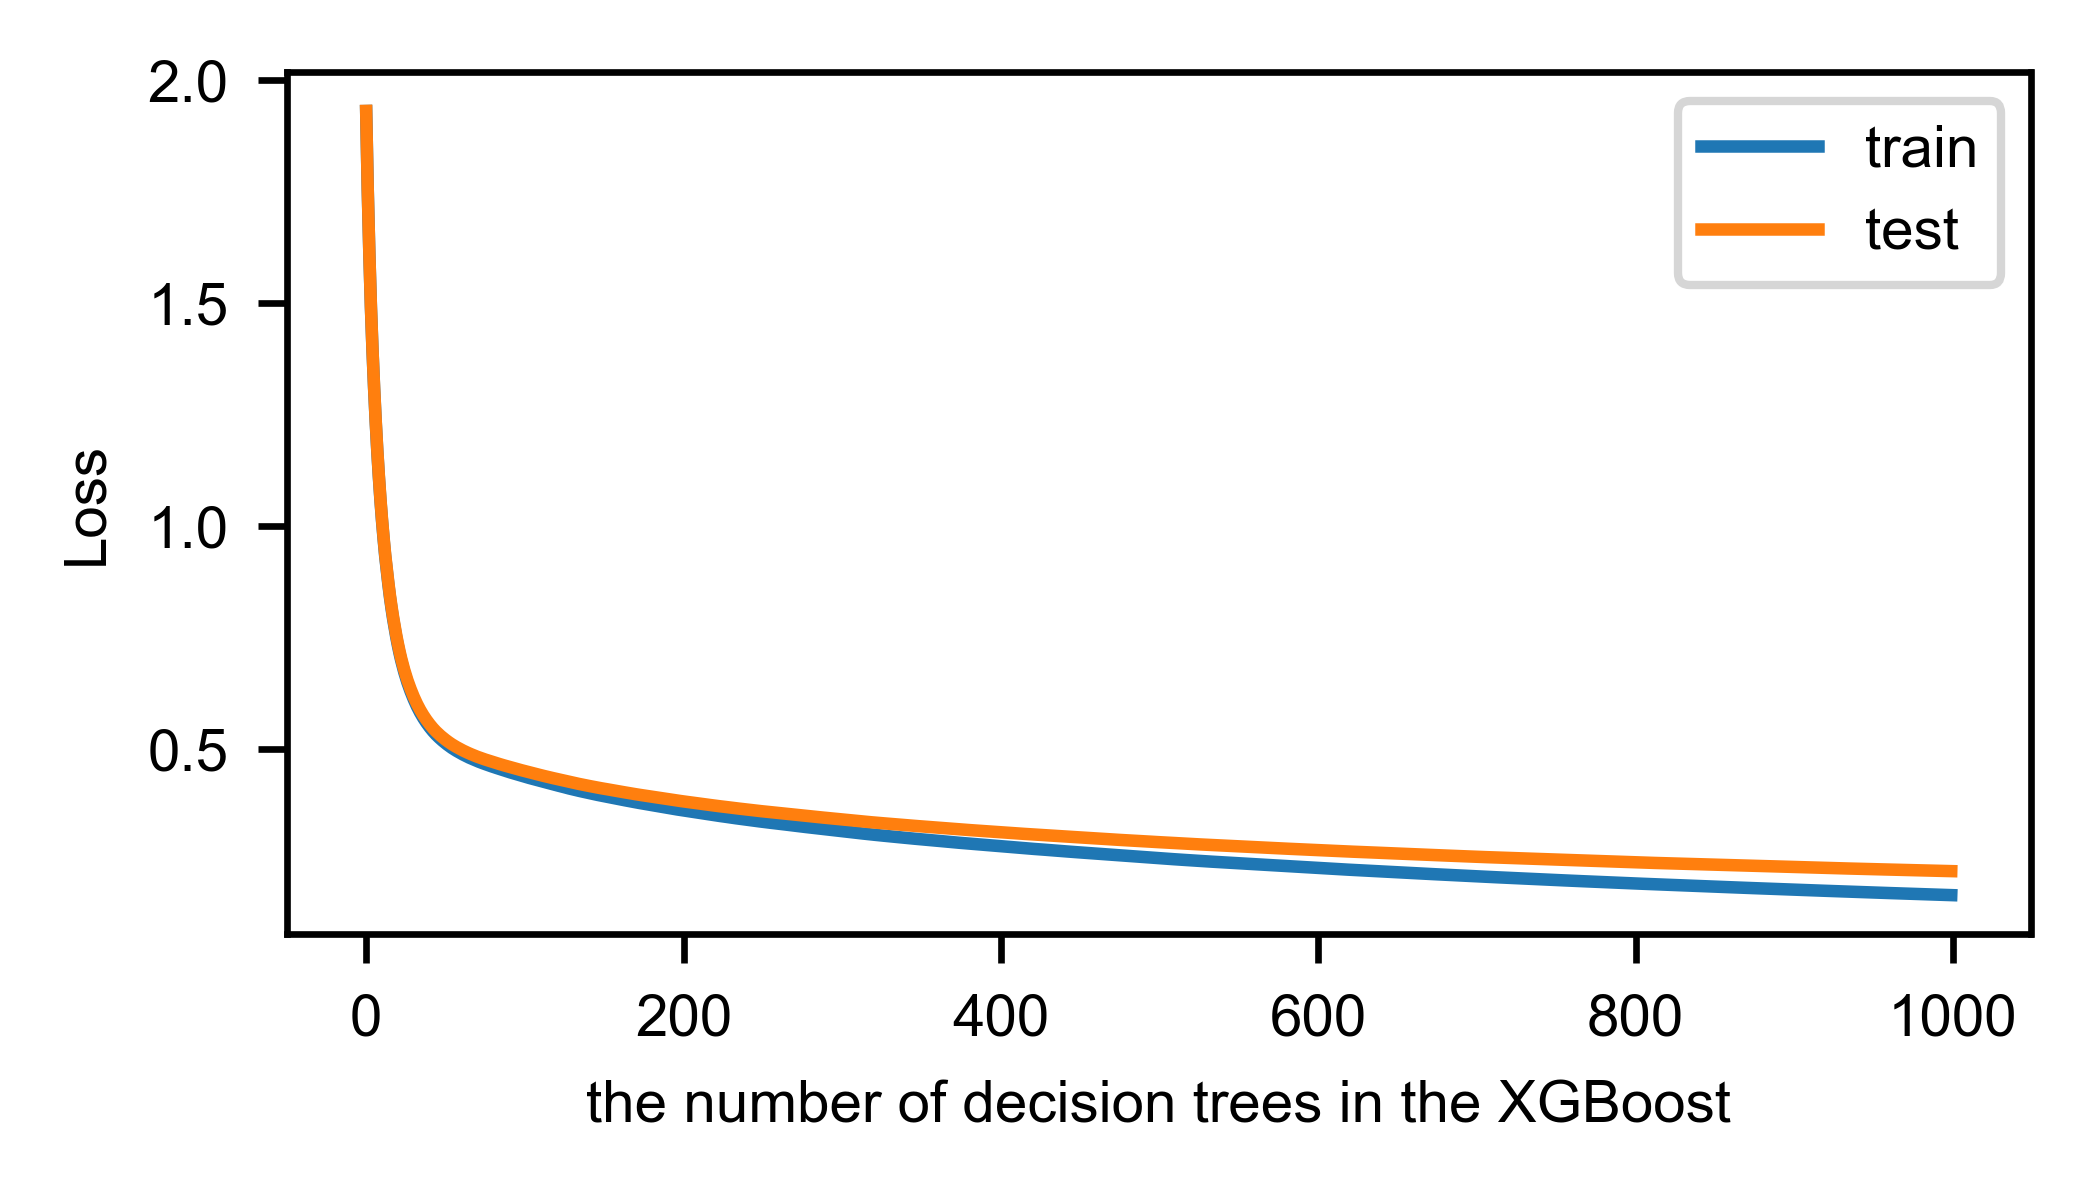

In [60]:
plt.figure(figsize=[3.5, 2])
plt.plot(np.arange(1000), cvresult_values[:,0], label='train')
plt.plot(np.arange(1000), cvresult_values[:,2], label='test')
plt.legend()
ax = plt.gca()

ax.set_xlabel('the number of decision trees in the XGBoost')

ax.set_ylabel('Loss')

plt.tight_layout()
plt.savefig("./result/figure/XGBoost_treenumber.png")

In [61]:
gsearch1 = joblib.load('./result/classifier/GridSearchXgBoost_without_intensity.joblib')
with open("./result/classifier/GridSearchCV2_XGBoost_without_intensity.pkl","rb") as file:
    gsearch2_cv_results_ = pickle.load(file)
gsearch3 = joblib.load('./result/classifier/GridSearchXgBoost_without_intensity3.joblib')

In [62]:
train_score = list(gsearch1.cv_results_['mean_train_score'][2:-1:3] ) + list(gsearch2_cv_results_['mean_train_score'][2::4]) + list(gsearch3.cv_results_['mean_train_score'])
test_score = list(gsearch1.cv_results_['mean_test_score'][2:-1:3] ) + list(gsearch2_cv_results_['mean_test_score'][2::4]) + list(gsearch3.cv_results_['mean_test_score'])

D:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


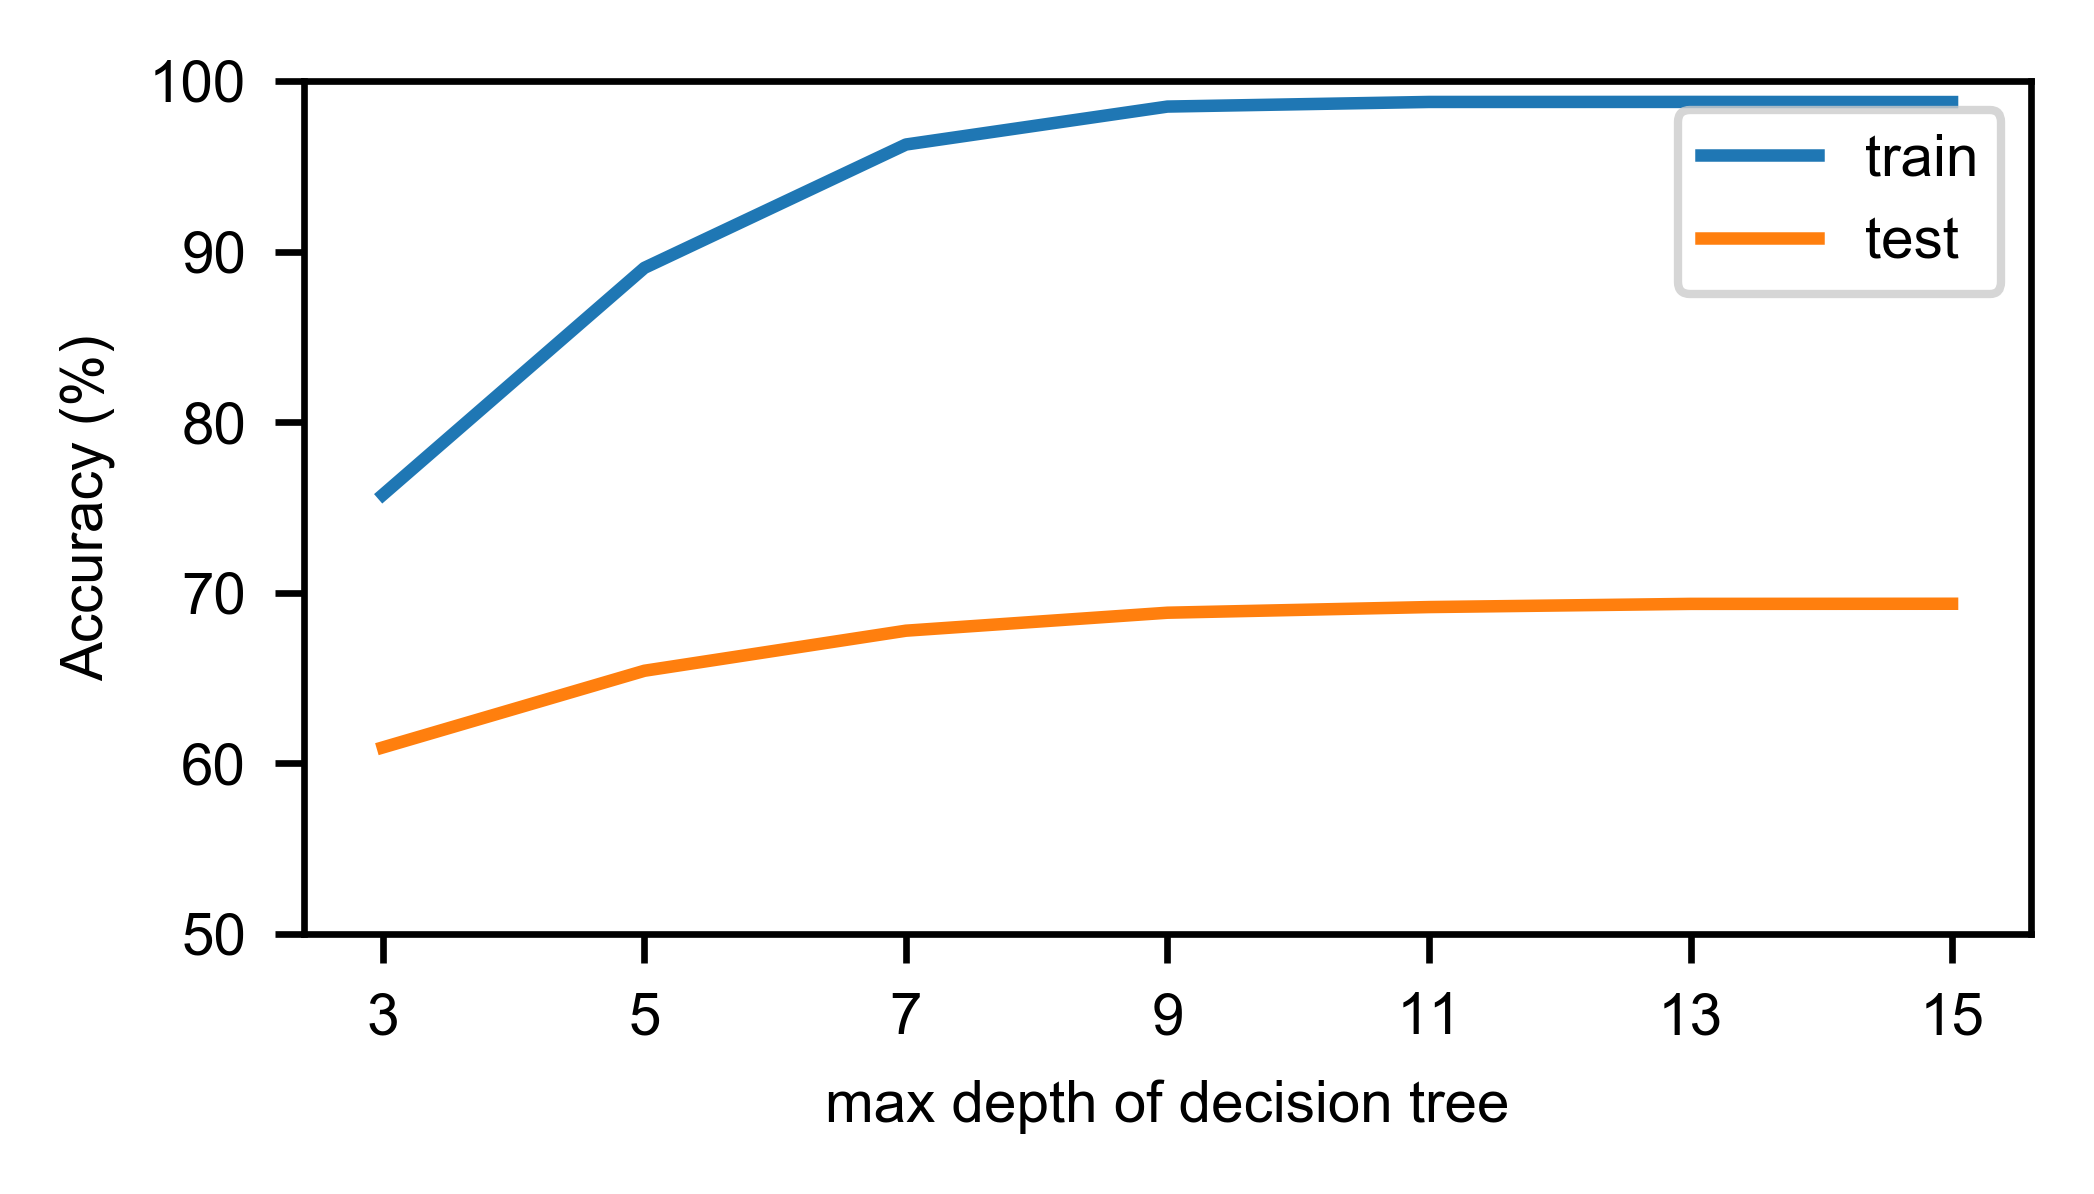

In [63]:
plt.figure(figsize=[3.5,2])
plt.plot(range(len(train_score)), train_score, label='train')
plt.plot(range(len(test_score)), test_score, label='test')
plt.legend()

ax = plt.gca()
ax.set_ylim(0.5,1)
ax.set_yticks(np.arange(0.5, 1.01, 0.1))
ax.set_yticklabels([50, 60, 70, 80, 90, 100])

ax.set_xticklabels(range(1,17,2))

ax.set_xlabel('max depth of decision tree')
ax.set_ylabel('Accuracy (%)')
plt.tight_layout()
plt.savefig("./result/figure/XGBoost_maxdepth.png")